In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

# Mean Median Mode

In [3]:
speed = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]

x = np.mean(speed)
y = np.median(speed)
z = stats.mode(speed)
print(x)
print(y)
print(z)

89.76923076923077
87.0
ModeResult(mode=86, count=3)


# Standard Deviation - Variance

In [8]:
speed = [86, 87, 88, 86, 87, 85, 86]
# var = std **2
x = np.std(speed)
var = np.var(speed)
print(x, var)

0.9035079029052513 0.8163265306122449


# Precentile

In [10]:
ages = [5, 31, 43, 48, 50, 41, 7, 11, 15, 39, 80, 82, 32, 2, 8, 6, 25, 36, 27, 61, 31]

x = np.percentile(ages, 75)

print(f"75% of the ages are equal or less than {x}")

75% of the ages are equal or less than 43.0


# Data Distribution

[2.59952251 0.24895544 0.45814598 2.50045665 3.81459042 3.61533101
 4.19026811 4.9269116  3.95346588 2.64054425 3.5515039  0.88136386
 1.07667673 2.13387892 4.0037971  4.83267288 0.21073254 4.11482046
 2.29644503 4.86304668 3.1172469  4.56342315 3.96365358 1.49241191
 0.07726071 4.14154117 1.29518827 1.01807905 3.16846762 4.48357986
 2.27335087 1.94487679 1.57744191 2.3006953  4.50712183 1.42781482
 4.32050111 1.31326268 4.17401316 4.71606234 1.45173813 0.94209536
 4.70531633 4.56595484 3.68093976 1.02808148 0.46152786 3.5012866
 3.07946806 4.77476221 3.0310673  2.42216252 1.39640859 1.95637215
 3.50701013 4.83047904 4.97187626 3.07307704 1.27597301 1.94668833
 3.95865749 1.6399952  4.98402827 2.94162164 2.74913369 0.32489155
 0.0111026  4.66052601 4.00303328 4.71167885 0.49763933 1.97566191
 1.29709635 0.16206827 4.79758591 0.0744204  2.34358671 2.21060051
 2.68816595 0.47129054 2.91824296 3.11382796 0.99967871 3.62478083
 0.95237867 2.8187191  4.51877756 2.91534963 2.54709903 3.06417

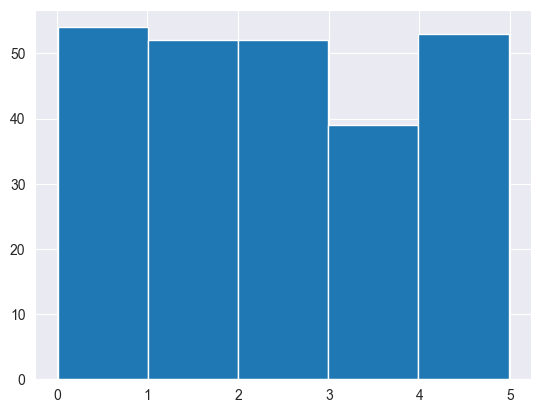

In [13]:
# create 250 randon floats between 0 and 5
x = np.random.uniform(0.0, 5.0, 250)

print(x)

plt.hist(x, 5)
plt.show()

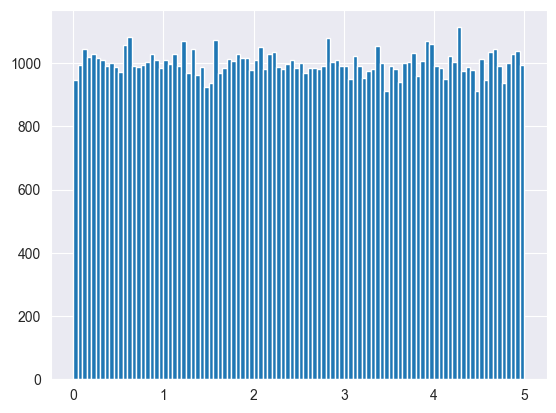

In [15]:
# big data
x = np.random.uniform(0.0, 5.0, 100000)

plt.hist(x, 100)
plt.show()

# Normal Data Distribution

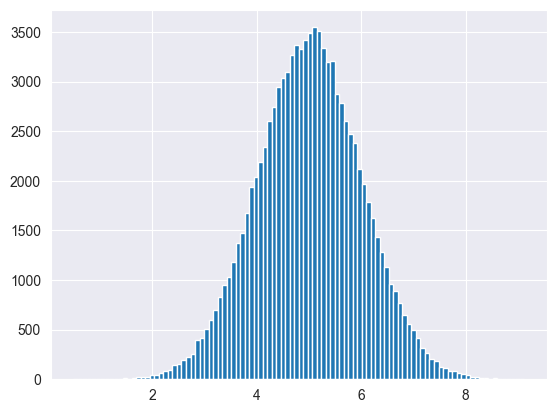

In [16]:
# mean = 5
# standard deviation = 1
x = np.random.normal(5.0, 1.0, 100000)

plt.hist(x, 100)
plt.show()

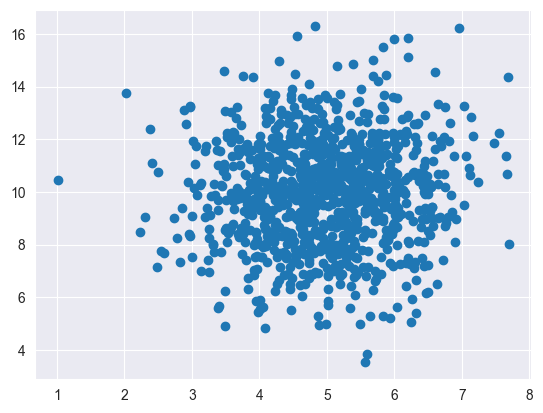

In [17]:
x = np.random.normal(5.0, 1.0, 1000)
y = np.random.normal(10.0, 2.0, 1000)

plt.scatter(x, y)
plt.show()

# Linear Regression

-1.7512877115526118 103.10596026490066
-0.758591524376155


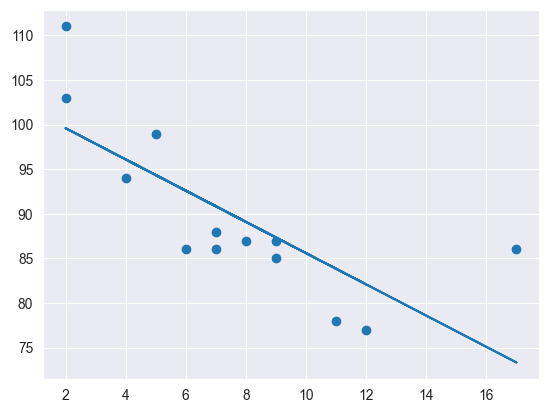

In [24]:
x = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]
y = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]

slope, intercept, r, p, std_err = stats.linregress(x, y)
print(slope, intercept)
print(r)  # the coefficient of correlation that varies between -1 and 1


def myfunc(x):
    return slope * x + intercept


mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

# Predict Future Values

In [25]:
speed = myfunc(10)

print(speed)

85.59308314937454


# Polynomial Regression


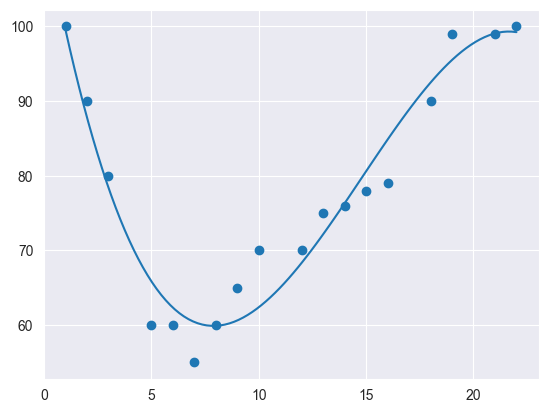

In [37]:
x = [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 21, 22]
y = [100, 90, 80, 60, 60, 55, 60, 65, 70, 70, 75, 76, 78, 79, 90, 99, 99, 100]

mymodel = np.poly1d(np.polyfit(x, y, 3)) # 3 is the degree

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

# R-Squared


In [38]:
# r**2 ranges from 0 to 1
print(r2_score(y, mymodel(x)))

0.9432150416451026


# Predict Future Values

In [39]:
speed = mymodel(17)
print(speed)

88.8733126969799


# Multiple Regression

In [42]:
df = pd.read_csv("data.csv")
#It is common to name the list of independent values with a upper case X, and the list of dependent values with a lower case y.
X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)

[107.2087328]


E:\Python Projects\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Coefficient


In [43]:
print(regr.coef_)
"""Weight: 0.00755095
Volume: 0.00780526

These values tell us that if the weight increase by 1kg, the CO2 emission increases by 0.00755095g.

And if the engine size (Volume) increases by 1 cm3, the CO2 emission increases by 0.00780526 g."""

[0.00755095 0.00780526]


# Scale

In [45]:
# z = (x - u ) / s ..standard normal
scale = StandardScaler()

scaledX = scale.fit_transform(X)

print(scaledX)

[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]
 [-1.30803892 -1.33263375]
 [-1.26615189 -0.81116837]
 [-0.7551301  -1.59336644]
 [-0.16871166 -0.0289703 ]
 [ 0.14125238 -0.0289703 ]
 [ 0.15800719 -0.0289703 ]
 [ 0.3046118  -0.0289703 ]
 [-0.05142797  1.53542584]
 [-0.72580918 -0.0289703 ]
 [ 0.14962979  1.01396046]
 [ 1.2219378  -0.0289703 ]
 [ 0.5685001   1.01396046]
 [ 0.3046118   1.27469315]
 [ 0.51404696 -0.0289703 ]
 [ 0.51404696  1.01396046]
 [ 0.72348212 -0.28970299]
 [ 0.8281997   1.01396046]
 [ 1.81254495  1.01396046]
 [ 0.96642691 -0.0289703 ]
 [ 1.72877089  1.01396046]
 [ 1.30990057  1.27469315]
 [ 1.90050772  1.01396046]
 [-0.23991961 -0.0289703 ]
 [ 0.40932938 -0.0289703 ]
 [ 0.47215993 -0.0289703 ]
 [ 0.4302729   2.31762392]]


# Train/Test

In [46]:
# didn't study it yet !

# Decision Tree

In [ ]:
# To make a decision tree, all data has to be numerical.
